# BAMBA Ousmane
### TP Titanic1

In [2]:
import pandas as pd
import numpy as np

- Faire l'inventaire des variables dans le jeu de donnée
- quelles sont les variables avec des valeurs manquantes?
- quelles sont les variables quantitatives, qualitatives?
- remplacer les valeurs manquantes dans les variables quantitatives par la mediane de la variable et les variables qualitatives par le vote majoritaire.
- quelle est la proportion des survivants, des decedés?


In [3]:
train = pd.read_csv("/home/ousmane/Documents/data/train.csv", sep=',')
#train.set_index("PassengerId", inplace=True, drop=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Inventaire des variables

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Les variables avec des données manquantes

In [6]:
def numberNA(x):
    return(sum(x.isnull()))

In [7]:
print(train.apply(numberNA, axis=0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Les variables quantitatives et qualitatives

In [88]:
def variable_type(df):
    quali=[]
    quanti=[]
    for col in df.columns:
        if df[col].dtypes == object :
            quali.append(col)
        else:
            quanti.append(col)
    
    print("Les variables qualitatives sont : {}".format(quali))
    print("Les variables quantitative sont : {}".format(quanti))
    return([quali,quanti])

In [87]:
test=variable_type(train)

Les variables qualitatives sont : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Les variables quantitative sont : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Surname']


### Remplacement des valeurs manquantes

In [89]:
from scipy.stats import mode

In [90]:
def imput_missing_value(df):
    for col in df.columns:
        if df[col].dtypes == object :
            df[col]= df[col].fillna(df[col].mode()[0])
        else:
            df[col]= df[col].fillna(df[col].median())
    return(df)

In [91]:
train=imput_missing_value(train)

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,False


### Proportion des survivants et des decedés

In [94]:
train.Survived.value_counts()/len(train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### quick modelisation: logistics Regression 



In [134]:
def parse_model(X, use_columns):
    if "Survived" not in X.columns:
        raise ValueError("target column survived should belong to df")
    target = X["Survived"]
    X = X[use_columns]
    return X, target

model_cols1 =['SibSp', 'Parch', 'Fare']
X, y = parse_model(X=train.copy(), use_columns=model_cols1)

In [135]:
X.head()

,SibSp,Parch,Fare
0,1,0,7.2500
1,1,0,71.2833
2,0,0,7.9250
3,1,0,53.1000
4,0,0,8.0500


##### Note: For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

In [97]:
#from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


### Un premier modèle avec SibSp, Parch et Fare

In [136]:
# separons le jeu de données en ensembles d'apprentissage, validation et test
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y, shuffle=True, test_size=1/2, stratify=y)
print("Training set size = {}".format(Xtrain.shape[0]))

Training set size = 445


In [137]:
clf_log = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr')

In [139]:
clf_log.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [140]:
clf_log.score(Xval,Yval)

0.6636771300448431

In [138]:
cross_val_score(clf_log,X,y,cv=5).mean()

0.674548857768335

### Etude des variables

In [98]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

Populating the interactive namespace from numpy and matplotlib


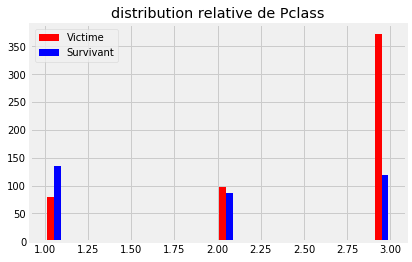

In [100]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline


def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()
plot_hist('Pclass')

In [141]:
from sklearn import preprocessing

def dummify_features(df):
    """
    Transform categorical variables to dummy variables.

    Parameters
    ----------
    df: dataframe containing only categorical features

    Returns
    -------
    X: new dataframe with dummified features
       Each column name becomes the previous one + the modality of the feature

    enc: the OneHotEncoder that produced X (it's used later in the processing chain)
    """
    colnames = df.columns
    le_dict = {}
    for col in colnames:
        le_dict[col] = preprocessing.LabelEncoder()
        le_dict[col].fit(df[col])
        df.loc[:, col] = le_dict[col].transform(df[col])

    enc = preprocessing.OneHotEncoder()
    enc.fit(df)
    X = enc.transform(df)

    dummy_colnames = [cv + '_' + str(modality) for cv in colnames for modality in le_dict[cv].classes_]
    # for cv in colnames:
    #     for modality in le_dict[cv].classes_:
    #         dummy_colnames.append(cv + '_' + modality)

    return X, dummy_colnames, enc
to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

In [142]:
X_dummy.head()

,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [143]:
X=pd.concat([X,X_dummy],axis=1)

In [144]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,0.0,0.0,1.0
1,1,0,71.2833,1.0,0.0,0.0
2,0,0,7.9250,0.0,0.0,1.0
3,1,0,53.1000,1.0,0.0,0.0
4,0,0,8.0500,0.0,0.0,1.0


### Ajoutons la variable Pclass au model (apres dummy)

In [145]:
clf_log = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr')

In [146]:
cross_val_score(clf_log,X,y,cv=5).mean()

0.6926591973081655

### Ajoutons la variable sex au modèle

In [148]:
to_dummify = ["Sex"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

In [149]:
X=pd.concat([X,X_dummy],axis=1)

In [150]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1,0,53.1000,1.0,0.0,0.0,1.0,0.0
4,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [151]:
clf_log = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr')

In [153]:
cross_val_score(clf_log,X,y,cv=5).mean()

0.7946119334545482

### Ajoutons une variable qui indique si un passager donnée est un enfant ou pas

In [154]:
X["isChild"]=train["Age"]<10

In [155]:
to_dummify = ["isChild"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(X[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

In [156]:
X=pd.concat([X,X_dummy],axis=1)

In [157]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,isChild,isChild_False,isChild_True
0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,False,1.0,0.0
1,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,False,1.0,0.0
2,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,False,1.0,0.0
3,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,False,1.0,0.0
4,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,False,1.0,0.0


In [158]:
X.drop(columns='isChild',inplace=True)

In [159]:
cross_val_score(clf_log,X,y,cv=5).mean()

0.8013473003457353

### Ajoutons les titres

In [160]:
def getTitle(str):
    return str.split(",")[1].split(".")[0].strip()

In [161]:
X["Title"]=train["Name"].apply(lambda x : getTitle(x))

In [162]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,isChild_False,isChild_True,Title
0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Mr
1,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Mrs
2,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Miss
3,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Mrs
4,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Mr


In [163]:
to_dummify = ["Title"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(X[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

In [165]:
X=pd.concat([X,X_dummy],axis=1)

In [166]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,isChild_False,isChild_True,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [167]:
X.drop(columns='Title',inplace=True)

In [168]:
cross_val_score(clf_log,X,y,cv=5).mean()

0.819344156136616

Nous passons a 0.81 en cross validation

### Ajoutons les surnoms

In [44]:
train['Surname']=train['Name'].apply(lambda x : '(' in x)
mask=train['Surname']==True
train.loc[mask,["Name","Surname"]]

,Name,Surname
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",True
9,"Nasser, Mrs. Nicholas (Adele Achem)",True
15,"Hewlett, Mrs. (Mary D Kingcome)",True
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",True
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",True
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",True
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",True
41,"Turpin, Mrs. William John Robert (Dorothy Ann ...",True


In [169]:
X["Surname"]=train["Surname"]

In [170]:
to_dummify = ["Surname"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(X[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

In [171]:
X=pd.concat([X,X_dummy],axis=1)

In [172]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,isChild_False,isChild_True,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Surname,Surname_False,Surname_True
0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,1.0,0.0
1,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,0.0,1.0
2,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1.0,0.0
3,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,True,0.0,1.0
4,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,1.0,0.0


In [58]:
import warnings
warnings.filterwarnings("ignore")

In [173]:
X.drop(columns='Surname',inplace=True)

In [174]:
cross_val_score(clf_log,X,y,cv=5).mean()

0.8272031185334212

In [178]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X, y, shuffle=True, test_size=1/2, stratify=y)
print("Training set size = {}".format(Xtrain.shape[0]))

Training set size = 445


In [180]:
clf_log2 = LogisticRegression(random_state=0, solver='liblinear',multi_class='ovr').fit(Xtrain,Ytrain)

In [181]:
pd.DataFrame(list(X.columns),list(clf_log2.coef_[0])) 

,0
-0.514173,SibSp
-0.469124,Parch
0.004052,Fare
0.880084,Pclass_1
0.198825,Pclass_2
-0.663313,Pclass_3
0.887275,Sex_female
-0.471679,Sex_male
-0.304214,isChild_False
0.719810,isChild_True


In [ ]:
- Faire la meme chose avec un modele ensembliste

### Random forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
clf_rd=RandomForestClassifier(n_estimators=500,oob_score=True)

In [185]:
clf_rd.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [186]:
clf_rd.score(Xval,Yval)

0.8094170403587444

In [184]:
cross_val_score(clf_rd,X,y,cv=5,scoring="accuracy").mean()

0.8092563374467646

### Let perform a gridsearch to improve model's performance

In [187]:
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection

In [188]:
param_grid = {'n_estimators': [400,450,500,550,600], 
              'max_depth': [4,6,8,10], 
              'min_samples_split': [10,20], 
              'min_samples_leaf': [5,10,15]}

f1sc = make_scorer(f1_score,average='micro')

grid_dt_estimator = model_selection.GridSearchCV(clf_rd, 
                                                 param_grid,
                                                 scoring=f1sc, 
                                                 refit=True,
                                                 cv=10, 
                                                 return_train_score=True,
                                                verbose=1,
                                                 n_jobs=6)
grid_dt_estimator.fit(X, y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed:  6.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'n_estimators': [400, 450, 500, 550, 600], 'max_depth': [4, 6, 8, 10], 'min_samples_split': [10, 20], 'min_samples_leaf': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score, average=micro), verbose=1)

In [189]:
grid_dt_estimator.score(X,y)

0.8406285072951739

### La matrice de confusion

In [190]:
from sklearn.metrics import confusion_matrix

confusion_matrix(grid_dt_estimator.predict(X),y)

array([[494,  87],
       [ 55, 255]])